$$r^2\ddot{R} + \dot{R} = -2m^2rR$$

$$r\ddot{R} + \frac{1}{r}\dot{R} = -2m^2R$$

$$\ddot{R}(t) \approx \frac{R(r+dr) -2R(r) + R(r-dr)}{dr^2}$$

$$\dot{R}(t) \approx \frac{R(r+dr) - R(r-dr)}{2dr}$$

$$\frac{r_i}{dr^2} (R_{i+1} -2R_i + R_{i-1}) + \frac{1}{2 r_i dr}(R_{i+1} - R_{i-1}) = -2m^2R_i $$

$$
R_{i+1}(\frac{r_i}{dr^2} + \frac{1}{2 r_i dr}) +
R_{i-1}(\frac{r_i}{dr^2} - \frac{1}{2 r_i dr}) +
R_i\frac{-2r_i}{dr^2} = -2m^2R_i
$$

$$MR = -2m^2R$$

where

$$M_{ii} = \frac{-2r_i}{dr^2}$$
$$M_{i,i-1} = \frac{r_i}{dr^2} - \frac{1}{2 r_i dr}$$
$$M_{i,i+1} = \frac{r_i}{dr^2} + \frac{1}{2 r_i dr}$$

boundary conditions:

$$R(r_0) = 0$$
$$\dot{R}(r_1) = 0$$

For first boundary condition, can simply rename $r_0$ to $r_{-1}$, which would anyway poke outside the matrix, so just crop tridiagonal at the start. For second constraint, can substitute first derivative into second derivative, arriving at expression

$$\frac{r_n}{dr^2} (-2R_n + 2R_{n-1}) = -2m^2R_n $$

Thus

$$M_{n,n-1} = \frac{2r_n}{dr^2}$$

<IPython.core.display.Javascript object>


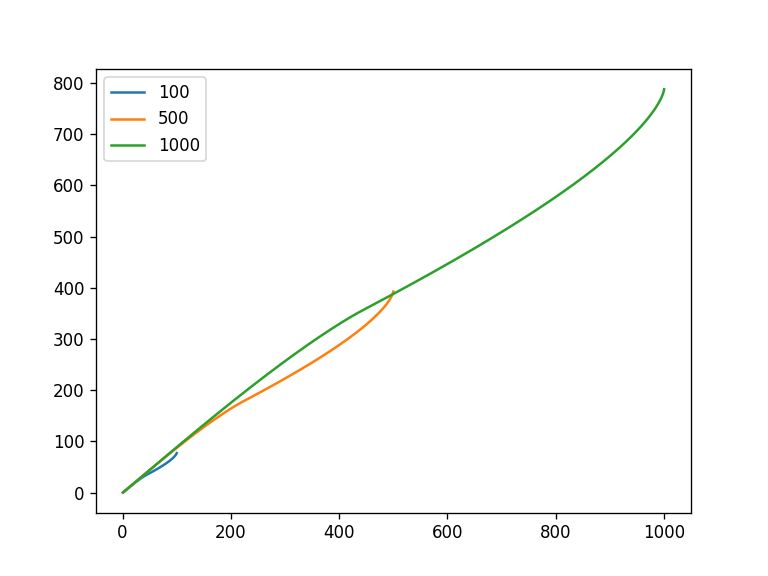

In [62]:
import numpy as np
import matplotlib.pyplot as plt

#####################
# Initial conditions
#####################
r0 = 1
r1 = 5

plt.figure()
for N in [100,500,1000]:

    #####################
    # Assembling Linear system
    #####################
    r = np.linspace(r0, r1, N)
    dr = r[1] - r[0]
    dr2 = dr**2

    M = np.zeros((N,N))

    for iRow in range(N):
        pref1 = r[iRow]/dr2
        pref2 = 1 / (2 * r[iRow] * dr)

        M[iRow, iRow]   = -2*pref1
        if iRow > 0:
            M[iRow, iRow-1] = pref1 - pref2
        if iRow < N-1:
            M[iRow, iRow+1] = pref1 + pref2

    M[N-1, N-2] = 2*r[N-1] / dr2

    # plt.figure()
    # plt.imshow(M)
    # plt.show()

    #####################
    # Solve eigenvalue problem
    #####################
    eig, evec = np.linalg.eig(M)
    args = np.argsort(eig)[::-1]
    eig = eig[args]
    evec = evec.T[args]


    plt.plot(np.arange(1, N+1), np.sqrt(-eig/2), label=str(N))

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


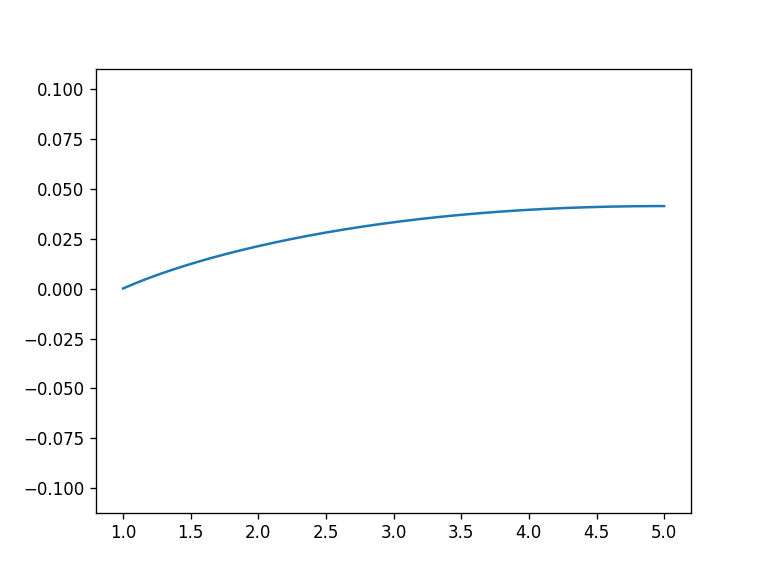

interactive(children=(IntSlider(value=10, description='x', max=999), Output()), _dom_classes=('widget-interact…

<function __main__.update(x)>

In [63]:
%matplotlib notebook
from ipywidgets import interact

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(r, evec[N//2])

def update(x):
    line.set_ydata(evec[int(x)])
    fig.canvas.draw_idle()

interact(update, x=widgets.IntSlider(min=0, max=N-1, step=1, value=10))

In [64]:
np.sqrt(-eig/2)[:10]

array([0.45607236, 1.33735621, 2.23632993, 3.13494659, 4.03305012,
       4.930833  , 5.82841248, 6.72585358, 7.62319328, 8.52045335])